# PROMEDIOS MÓVILES 

A continuación, se presenta el código para construir modelos de promedios móviles para la compañia ZTE

## LECTURA DE DATOS

In [2]:
#pip install pandas

In [3]:
import pandas as pd

In [4]:
from sklearn.metrics import mean_absolute_error

In [5]:
import matplotlib.pyplot as plt

In [6]:
datos = pd.read_csv("datos_completos.csv")

In [7]:
datos.head(10)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,ventas_totales_en_tienda_de_cada_mes,ventas_promedio_en_tienda_de_cada_mes,ventas_totales_en_tienda_de_cada_sku,ventas_promedio_en_tienda_de_cada_sku,ventas_totales_1_mes_pasado,...,ventas_totales_tienda_y_mes_3_pasado,ventas_promedio_tienda_y_mes_del_mes_pasado,ventas_promedio_tienda_y_mes_2_pasado,ventas_promedio_tienda_y_mes_3_pasado,ventas_totales_tienda_y_sku_del_mes_pasado,ventas_totales_tienda_y_sku_2_pasado,ventas_totales_tienda_y_sku_3_pasado,ventas_promedio_tienda_y_sku_del_mes_pasado,ventas_promedio_tienda_y_sku_2_pasado,ventas_promedio_tienda_y_sku_3_pasado
0,1,0,1,9,4,12,0.413793,2275,1.561428,9,...,12,0.413793,0.413793,0.413793,2275,2275,2275,1.561428,1.561428,1.561428
1,1,1,1,4,0,13,0.448276,1856,1.273850,9,...,12,0.413793,0.413793,0.413793,2275,2275,2275,1.561428,1.561428,1.561428
2,1,2,1,0,0,2,0.068966,157,0.107756,4,...,12,0.448276,0.413793,0.413793,1856,2275,2275,1.273850,1.561428,1.561428
3,1,3,1,0,2,2,0.068966,2,0.001373,0,...,12,0.068966,0.448276,0.413793,157,1856,2275,0.107756,1.273850,1.561428
4,1,4,1,2,0,6,0.206897,343,0.235415,0,...,13,0.068966,0.068966,0.448276,2,157,1856,0.001373,0.107756,1.273850
5,1,5,1,0,0,16,0.551724,302,0.207275,2,...,2,0.206897,0.068966,0.068966,343,2,157,0.235415,0.001373,0.107756
6,1,6,1,0,0,1,0.034483,64,0.043926,0,...,2,0.551724,0.206897,0.068966,302,343,2,0.207275,0.235415,0.001373
7,1,7,1,0,0,0,0.000000,38,0.026081,0,...,6,0.034483,0.551724,0.206897,64,302,343,0.043926,0.207275,0.235415
8,1,8,1,0,0,1,0.034483,19,0.013040,0,...,16,0.000000,0.034483,0.551724,38,64,302,0.026081,0.043926,0.207275
9,1,0,2,2,1,12,0.413793,77,0.052848,2,...,12,0.413793,0.413793,0.413793,77,77,77,0.052848,0.052848,0.052848


In [8]:
datos.shape

(380277, 24)

In [9]:
datos.columns

Index(['pdv_id', 'mes_id', 'sku_id', 'ventas_totales',
       'y_ventas_siguiente_mes', 'ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'],
      dtype='object')

Eliminar columnas innecesarias en MA

In [10]:
datos_ma = datos.drop(['ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'], axis=1)

In [11]:
datos_ma.head(10)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes
0,1,0,1,9,4
1,1,1,1,4,0
2,1,2,1,0,0
3,1,3,1,0,2
4,1,4,1,2,0
5,1,5,1,0,0
6,1,6,1,0,0
7,1,7,1,0,0
8,1,8,1,0,0
9,1,0,2,2,1


Primer modelo: Pedir lo del mes anterior

In [12]:
#pedir lo del mes anteior
#lo que pedi en junio es lo mismo para julio
#para crear nuevas columnas 
datos_ma['m1_pedir_lo_del_mes_pasado'] = datos_ma['ventas_totales']

In [13]:
datos_ma.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado
0,1,0,1,9,4,9
1,1,1,1,4,0,4
2,1,2,1,0,0,0
3,1,3,1,0,2,0
4,1,4,1,2,0,2
5,1,5,1,0,0,0
6,1,6,1,0,0,0
7,1,7,1,0,0,0
8,1,8,1,0,0,0
9,1,0,2,2,1,2


Pedir un promedio de los dos meses anteriores (cuanto tarda en correr (3:44 - 3:44 menos de 1 minuto))

In [14]:
#Pedir un promedio de los 2 meses anteriores 
datos_ma['m2_promedio_de_dos_meses_anteriores'] = datos_ma.groupby(['pdv_id','sku_id']).rolling(2)['ventas_totales'].mean().reset_index(drop=True)

In [15]:
datos_ma.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores
0,1,0,1,9,4,9,NaN
1,1,1,1,4,0,4,6.5
2,1,2,1,0,0,0,2.0
3,1,3,1,0,2,0,0.0
4,1,4,1,2,0,2,1.0
5,1,5,1,0,0,0,1.0
6,1,6,1,0,0,0,0.0
7,1,7,1,0,0,0,0.0
8,1,8,1,0,0,0,0.0
9,1,0,2,2,1,2,NaN




    -Crear nueva columna
    -Agrupar por punto de venta y sku
    -Función rolling: Proporcione cálculos de ventana rodante.
    -Función resent index - si no lo colocamos sale error - como tenemos un group_by el resultado en sí del comando queda como un conjunto de datos indexados, los cuales no se pueden poner en una columna, por lo tanto, hay que descartar esos índices.



Pedir un promedio de los 3 meses anteriores (1 min apróx. )

In [16]:
#Pedir un promedio de los 2 meses anteriores 
datos_ma['m3_promedio_de_tres_meses_anteriores'] = datos_ma.groupby(['pdv_id','sku_id']).rolling(3)['ventas_totales'].mean().reset_index(drop=True)
datos_ma.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
0,1,0,1,9,4,9,NaN,NaN
1,1,1,1,4,0,4,6.5,NaN
2,1,2,1,0,0,0,2.0,4.333333
3,1,3,1,0,2,0,0.0,1.333333
4,1,4,1,2,0,2,1.0,0.666667
5,1,5,1,0,0,0,1.0,0.666667
6,1,6,1,0,0,0,0.0,0.666667
7,1,7,1,0,0,0,0.0,0.000000
8,1,8,1,0,0,0,0.0,0.000000
9,1,0,2,2,1,2,NaN,NaN


## Calcular Errores 

Dividir en conjuntos de datos por mes

In [17]:
error_julio= datos_ma[datos_ma.mes_id == 0]
error_julio.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
0,1,0,1,9,4,9,NaN,NaN
9,1,0,2,2,1,2,NaN,NaN
18,1,0,3,1,6,1,NaN,NaN
27,1,0,4,0,2,0,NaN,NaN
36,1,0,5,0,0,0,NaN,NaN


In [18]:
error_agosto= datos_ma[datos_ma.mes_id == 1]
error_agosto.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
1,1,1,1,4,0,4,6.5,NaN
10,1,1,2,1,0,1,1.5,NaN
19,1,1,3,6,1,6,3.5,NaN
28,1,1,4,2,1,2,1.0,NaN
37,1,1,5,0,0,0,0.0,NaN


In [19]:
error_septiembre= datos_ma[datos_ma.mes_id == 2]
error_septiembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
2,1,2,1,0,0,0,2.0,4.333333
11,1,2,2,0,0,0,0.5,1.000000
20,1,2,3,1,0,1,3.5,2.666667
29,1,2,4,1,1,1,1.5,1.000000
38,1,2,5,0,1,0,0.0,0.000000


In [20]:
error_octubre= datos_ma[datos_ma.mes_id == 3]
error_octubre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
3,1,3,1,0,2,0,0.0,1.333333
12,1,3,2,0,0,0,0.0,0.333333
21,1,3,3,0,4,0,0.5,2.333333
30,1,3,4,1,0,1,1.0,1.333333
39,1,3,5,1,0,1,0.5,0.333333


In [21]:
error_noviembre= datos_ma[datos_ma.mes_id == 4]
error_noviembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
4,1,4,1,2,0,2,1.0,0.666667
13,1,4,2,0,0,0,0.0,0.000000
22,1,4,3,4,4,4,2.0,1.666667
31,1,4,4,0,0,0,0.5,0.666667
40,1,4,5,0,0,0,0.5,0.333333


In [22]:
error_diciembre= datos_ma[datos_ma.mes_id == 5]
error_diciembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
5,1,5,1,0,0,0,1.0,0.666667
14,1,5,2,0,0,0,0.0,0.000000
23,1,5,3,4,0,4,4.0,2.666667
32,1,5,4,0,0,0,0.0,0.333333
41,1,5,5,0,0,0,0.0,0.333333


In [23]:
error_enero= datos_ma[datos_ma.mes_id == 6]
error_enero.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
6,1,6,1,0,0,0,0.0,0.666667
15,1,6,2,0,0,0,0.0,0.000000
24,1,6,3,0,0,0,2.0,2.666667
33,1,6,4,0,0,0,0.0,0.000000
42,1,6,5,0,0,0,0.0,0.000000


In [24]:
error_febrero= datos_ma[datos_ma.mes_id == 7]
error_febrero.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
7,1,7,1,0,0,0,0.0,0.000000
16,1,7,2,0,0,0,0.0,0.000000
25,1,7,3,0,0,0,0.0,1.333333
34,1,7,4,0,0,0,0.0,0.000000
43,1,7,5,0,0,0,0.0,0.000000


In [25]:
error_febrero.shape

(42253, 8)

In [26]:
error_marzo= datos_ma[datos_ma.mes_id == 8]
error_marzo.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
8,1,8,1,0,0,0,0.0,0.0
17,1,8,2,0,0,0,0.0,0.0
26,1,8,3,0,0,0,0.0,0.0
35,1,8,4,0,0,0,0.0,0.0
44,1,8,5,0,0,0,0.0,0.0


In [27]:
error_marzo.shape

(42253, 8)

Calcular el error mes/modelo (un valor por objeto creado)

#cálculo manual 
#sum(abs(error_julio['y_ventas_siguiente_mes'] - error_julio['m1_pedir_lo_del_mes_pasado']))/42253

In [28]:
error_m1_julio = mean_absolute_error(error_julio['y_ventas_siguiente_mes'], error_julio['m1_pedir_lo_del_mes_pasado'])
error_m2_julio = None
error_m3_julio = None

In [29]:
error_m1_agosto = mean_absolute_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m1_pedir_lo_del_mes_pasado'])
error_m2_agosto = mean_absolute_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m2_promedio_de_dos_meses_anteriores'])
error_m3_agosto = None

In [30]:
error_m1_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m1_pedir_lo_del_mes_pasado'])
error_m2_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m3_promedio_de_tres_meses_anteriores'])

In [31]:
error_m1_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m1_pedir_lo_del_mes_pasado'])
error_m2_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m2_promedio_de_dos_meses_anteriores'])
error_m3_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m3_promedio_de_tres_meses_anteriores'])

In [32]:
error_m1_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m1_pedir_lo_del_mes_pasado'])
error_m2_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m3_promedio_de_tres_meses_anteriores'])

In [33]:
error_m1_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m1_pedir_lo_del_mes_pasado'])
error_m2_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m3_promedio_de_tres_meses_anteriores'])

In [34]:
error_m1_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m1_pedir_lo_del_mes_pasado'])
error_m2_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m2_promedio_de_dos_meses_anteriores'])
error_m3_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m3_promedio_de_tres_meses_anteriores'])

In [35]:
error_m1_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m1_pedir_lo_del_mes_pasado'])
error_m2_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m2_promedio_de_dos_meses_anteriores'])
error_m3_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m3_promedio_de_tres_meses_anteriores'])

In [36]:
error_m1_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m1_pedir_lo_del_mes_pasado'])
error_m2_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m2_promedio_de_dos_meses_anteriores'])
error_m3_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m3_promedio_de_tres_meses_anteriores'])

Crear dataframe con errores

In [37]:
errores_mae = [['Julio', error_m1_julio, error_m2_julio, error_m3_julio],
               ['Agosto', error_m1_agosto, error_m2_agosto, error_m3_agosto],
               ['Septiembre', error_m1_septiembre, error_m2_septiembre, error_m3_septiembre],
               ['Octubre', error_m1_octubre, error_m2_octubre, error_m3_octubre],
               ['Noviembre', error_m1_noviembre, error_m2_noviembre, error_m3_noviembre],
               ['Diciembre', error_m1_diciembre, error_m2_diciembre, error_m3_diciembre],
               ['Enero', error_m1_enero, error_m2_enero, error_m3_enero],
               ['Febrero', error_m1_febrero, error_m2_febrero, error_m3_febrero],
               ['Marzo', error_m1_marzo, error_m2_marzo, error_m3_marzo]
              ]
mae = pd.DataFrame(errores_mae, columns = ['Mes', 'mae_pedir_anterior','mae_promedio_2_meses_anteriores','mae_promedio_3_meses_anteriores'])
mae

,Mes,mae_pedir_anterior,mae_promedio_2_meses_anteriores,mae_promedio_3_meses_anteriores
0,Julio,0.126074,NaN,NaN
1,Agosto,0.122122,0.121021,NaN
2,Septiembre,0.036826,0.080941,0.094534
3,Octubre,0.087426,0.090195,0.111740
4,Noviembre,0.180626,0.164722,0.163491
5,Diciembre,0.160438,0.129790,0.099804
6,Enero,0.049488,0.103081,0.099472
7,Febrero,0.026365,0.035583,0.075679
8,Marzo,0.011242,0.015952,0.023683


## Crear gráfica

Text(0.5, 1.0, 'Error Absoluto Total en Modelos Base')

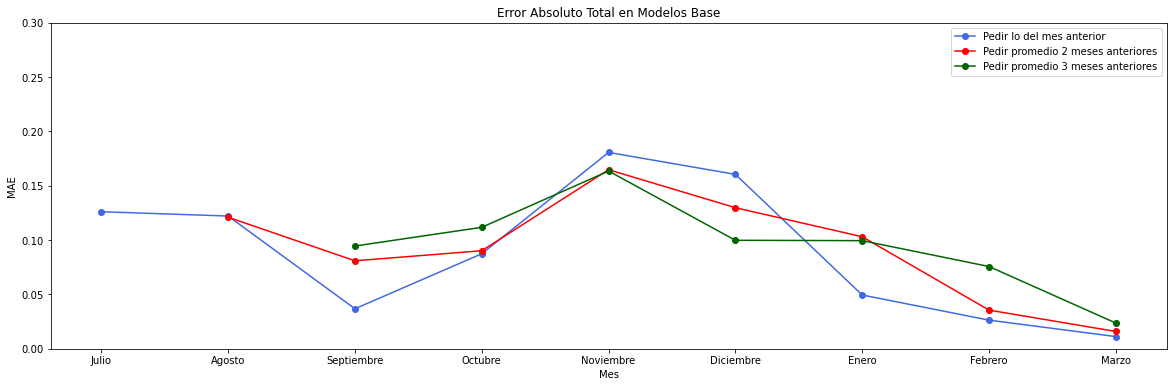

In [38]:
plt.figure(figsize=(20,6)) #impresión de la figura
plt.plot(mae.Mes, mae.mae_pedir_anterior,'-o',color="royalblue")
plt.plot(mae.Mes, mae.mae_promedio_2_meses_anteriores, '-o', color="red")
plt.plot(mae.Mes, mae.mae_promedio_3_meses_anteriores, '-o', color="darkgreen")
plt.legend(['Pedir lo del mes anterior','Pedir promedio 2 meses anteriores','Pedir promedio 3 meses anteriores'])
plt.ylim(0,0.3)
plt.ylabel('MAE')
plt.xlabel('Mes')
plt.title('Error Absoluto Total en Modelos Base')